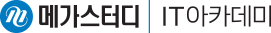

# 입문자를 위한, 파이썬 데이터 분석   

## Part(1) - Day4  :  
2021-08-06(금)

]

#### 공통 사항 (Reference )

- 파이썬 Python ?
  https://wikidocs.net/6

- 데이터 분석?
  https://miro.medium.com/max/1986/1*jd_xgOzAFw7rBklREtgOTQ.png
  
- anaconda 사이트 접속 ( https://www.anaconda.com/download/ )
  - 설치 참조 자료 : 
http://www.openwith.net/wp-content/uploads/2018/01/%EC%95%84%EB%82%98%EC%BD%98%EB%8B%A4%EC%99%80-%EC%A3%BC%ED%94%BC%ED%84%B0.pdf

]

## Today's mission

- 이전 시간 Review 
  - Python 사용을 위한 `Anaconda` 설치 및 Python 개발환경IDE(Integrated Development Environment) `Jupyter notebook` 사용법
  - Python 기본 사항요약
  - 데이터분석 패키지: pandas
  - 시각화 패키지: seaborn


- 데이터 시각화 패키지: matplotlib, seaborn
- 활용실습(1): 
  - 공공데이터 분석 및 지도 시각화 연습

- 활용실습(2):
  - Kaggle competition (Titanic: Machine Learning from Disaster)

### `활용실습(2)` : (pandas 활용, ) Kaggle competition (Titanic: Machine Learning from Disaster)

https://www.kaggle.com/c/titanic

> `Kaggle 참여방법` 참고용: 
- 1) 회원가입 
- 2) 경진대회 선정 (종료된 과거 경진대회 참여를 통해 경험쌓는 것부터 시작)
- 3) 데이터 이해 (EDA(Exploratory Data Analysis); 탐색적 데이터 분석)
- 4) 평가척도 이해 (Evaluation)
- 5) 검증방법 및 Feature Engineering (새로운 컬럼 만들기)
- 6) 고급기법 적용 (모델 튜닝, 앙상블 등)


In [1]:
import pandas as pd

### 데이터 읽어오기

In [2]:
# train.csv 파일을 읽어옵니다. 여기서 PassengerId라는 컬럼을 인덱스(index)로 지정한 뒤, train 변수에 할당합니다.
train = pd.read_csv("train.csv", index_col="PassengerId")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력
print(train.shape)

# head()로 train 데이터의 상위 5개를 출력
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 정리 + 기본 분석

**1. 타이타닉의 train 데이터에서 1) 전체 생존률과 2) 생존자의 총 인원수, 사망자의 총 인원수를 출력해주세요.**

1번(생존률)의 경우 약 38.3%가 나와야 하며, 2번(인원수)의 경우 생존자의 총 인원수는 342명, 사망자의 총 인원수는 549명이 나와야 합니다.

In [3]:
# 타이타닉의 train데이터에서 Survived 컬럼의 평균을 구합니다.
# 현재 0.0 ~ 1.0 사이의 값을 갖을 것이므로, 백분율(%)로 전환하기 위해 100을 곱해줍니다.

# 전체 생존률
survived_rate = train["Survived"].mean()
survived_rate = survived_rate * 100
print(f"생존률 = {survived_rate:.1f}%")

생존률 = 38.4%


In [4]:
# pandas의 value_counts를 활용하여 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.

# 생존자의 총 인원수 , 사망자의 총 인원수
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [1]:
# 성별 평균 생존률
train.groupby('Sex')['Survived'].mean()

NameError: name 'train' is not defined

In [ ]:
pd.pivot_table(data=train, index='Pclass',values='Survived')

**2. Survived 컬럼에 들어가 있는 값을 쉬운 표현으로 바꿔주세요.**

Survived 컬럼에는 0(사망)이라는 값과 1(생존)이라는 값이 있습니다. 이 표현은 직관적이지 않기 때문에, 데이터 분석을 원활하게 하기 위해서 읽기 쉬운 표현을 쓰는 것이 좋습니다.

In [5]:
# Survived 컬럼의 결과값은 0과 1로 표현되는데, Survived 컬럼에 대한 사전 설명이 없으면 이 값이 어떠한 의미를 가지는지 직관적으로 이해하기 어렵습니다.
train["Survived"].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Survived(Status)라는 새로운 컬럼을 만들어, 이 컬럼에는 0(사망), 1(생존) 정보를, Perish(사망), Survived(생존)이라는 값으로 전환해주세요.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Survived</th>
        <th>Survived(Status)</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>0</td>
        <td>Perish</td>
      </tr>
      <tr>
        <th>2</th>
        <td>1</td>
        <td>Survived</td>
      </tr>
      <tr>
        <th>3</th>
        <td>1</td>
        <td>Survived</td>
      </tr>
      <tr>
        <th>4</th>
        <td>1</td>
        <td>Survived</td>
      </tr>
      <tr>
        <th>5</th>
        <td>0</td>
        <td>Perish</td>
      </tr>
    </tbody>
</table>

In [6]:
# 먼저 Survived 컬럼이 0인 승객을 색인합니다. 이후 Survived(Status)라는 이름의
# 새로운 컬럼을 만들어 여기에 Perish 라는 값을 넣습니다.
# 0을 사망, 1을 생존으로 전환
train.loc[train["Survived"] == 0, "Survived(humanized)"] = "Perish"

# Survived 컬럼이 1인 승객에 대해서도 수행합니다.
# Type your code
train.loc[train["Survived"] == 1, "Survived(humanized)"] = "Survived"
print(train.shape)
train[["Survived", "Survived(humanized)"]].head()

(891, 12)


,Survived,Survived(humanized)
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


In [7]:
# pandas의 value_counts를 활용하여 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
# 생존자의 총 인원수(Survived)은 342명, 사망자의 총 인원수(Perish)는 549명이 나와야 합니다.

# Type your code

train["Survived(humanized)"].value_counts()

Perish      549
Survived    342
Name: Survived(humanized), dtype: int64

**3. Pclass 컬럼에 들어가 있는 값을 읽기 쉬운 표현으로 바꿔주세요.**

Pclass도 마찬가지로 1, 2, 3이라는 표현은 직관적이지 않기 때문에, 사람이 이해하기 쉬운 표현으로 바꿔주고 싶습니다.

In [8]:
# pandas의 pivot_table을 활용하여 Pclass별 생존률을 출력합니다.

# Type your code 

pd.pivot_table(data=train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


이번에는 **Pclass(Status)**라는 새로운 컬럼을 만들어주세요. 이 컬럼에는 1, 2, 3이 아닌 First Class, Business, Economy 라는 값이 들어가도록 하여, 최종적으로는 다음의 결과가 나오도록 해보세요.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Pclass</th>
        <th>Pclass(Status)</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>3</td>
        <td>Economy</td>
      </tr>
      <tr>
        <th>2</th>
        <td>1</td>
        <td>First Class</td>
      </tr>
      <tr>
        <th>3</th>
        <td>3</td>
        <td>Economy</td>
      </tr>
      <tr>
        <th>4</th>
        <td>1</td>
        <td>First Class</td>
      </tr>
      <tr>
        <th>5</th>
        <td>3</td>
        <td>Economy</td>
      </tr>
    </tbody>
</table>

In [9]:
# 등급 바꾸기
train.loc[train["Pclass"] == 1, "Pclass(Status)"] = "First Class"
train.loc[train["Pclass"] == 2, "Pclass(Status)"] = "Business"
train.loc[train["Pclass"] == 3, "Pclass(Status)"] = "Economy"
print(train.shape)
train[["Pclass", "Pclass(Status)"]].head()

(891, 13)


,Pclass,Pclass(Status)
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


또한 다음의 결과가 나오도록 출력해 보세요.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Survived</th>
      </tr>
      <tr>
        <th>Pclass(Status)</th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>Business</th>
        <td>0.472826</td>
      </tr>
      <tr>
        <th>Economy</th>
        <td>0.242363</td>
      </tr>
      <tr>
        <th>First Class</th>
        <td>0.629630</td>
      </tr>
    </tbody>
  </table>

In [10]:
# Type your code 
pd.pivot_table(data=train, index="Pclass(Status)", values="Survived")

,Survived
Pclass(Status),
Business,0.472826
Economy,0.242363
First Class,0.629630


In [11]:
# Type your code 

train.shape


(891, 13)

In [12]:
train[["Pclass", "Pclass(Status)"]].head()

,Pclass,Pclass(Status)
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


In [13]:
pd.pivot_table(data=train, index='Pclass(Status)', values='Survived')

,Survived
Pclass(Status),
Business,0.472826
Economy,0.242363
First Class,0.629630


**4. Embarked 컬럼에 들어가 있는 값을 읽기 쉬운 표현으로 바꿔주세요.**

Embarked 컬럼도 마찬가지로 C, S, Q라는 표현은 직관적이지 않습니다. 이해하기 쉽게끔 C는 Cherbourg 라는 표현으로, S는 Southampton 이라는 표현으로, 그리고 Q는 Queenstown 이라는 표현으로 바꾸겠습니다.

In [14]:
# Embarked 기준으로 탑승객의 생존률을 분석
pd.pivot_table(data=train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


앞에서 Survived, Pclass와 마찬가지로, Embarked 컬럼도 **Embarked(Status)**라는 이름의 새로운 컬럼을 만들고, 이 컬럼에는 C, S, Q가 아닌 Cherbourg, Southampton, Queenstown이라는 값이 들어가도록 전환합니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Embarked</th>
        <th>Embarked(Status)</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>S</td>
        <td>Southampton</td>
      </tr>
      <tr>
        <th>2</th>
        <td>C</td>
        <td>Cherbourg</td>
      </tr>
      <tr>
        <th>3</th>
        <td>S</td>
        <td>Southampton</td>
      </tr>
      <tr>
        <th>4</th>
        <td>S</td>
        <td>Southampton</td>
      </tr>
      <tr>
        <th>5</th>
        <td>S</td>
        <td>Southampton</td>
      </tr>
    </tbody>
  </table>

In [15]:
# Type your code 
train.loc[train["Embarked"] == "C", "Embarked(Status)"] = "Cherebourg"
train.loc[train["Embarked"] == "S", "Embarked(Status)"] = "Southampton"
train.loc[train["Embarked"] == "Q", "Embarked(Status)"] = "Queenstown"
train[["Embarked", "Embarked(Status)"]].head()
#train.shape


,Embarked,Embarked(Status)
PassengerId,,
1,S,Southampton
2,C,Cherebourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


그리고 마찬가지로 이번에도 Embarked가 아닌 새롭게 만든 Embarked(humanized) 컬럼으로 pivot_table을 만들어주세요. 여기에는 Cherbourg, Southampton, 그리고 Queenstown 에 탑승한 승객의 생존률이 출력됩니다. 최종적으로는 다음의 결과가 나와야 합니다.

 <table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Survived</th>
      </tr>
      <tr>
        <th>Embarked(Status)</th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>Cherbourg</th>
        <td>0.553571</td>
      </tr>
      <tr>
        <th>Queenstown</th>
        <td>0.389610</td>
      </tr>
      <tr>
        <th>Southampton</th>
        <td>0.336957</td>
      </tr>
    </tbody>
  </table>

In [16]:
# pandas의 pivot_table을 활용하여 Embarked별 생존률을 출력하는데, Embarked 컬럼이 아닌 Embarked(Status) 컬럼을 사용합니다.
pd.pivot_table(data=train, index="Embarked(Status)", values="Survived")
# Type your code 


,Survived
Embarked(Status),
Cherebourg,0.553571
Queenstown,0.389610
Southampton,0.336957


**5. Embarked 컬럼과 Pclass 컬럼을 One Hot Encoding 해주세요**

앞서 작성한 코드를 활용하여 Embarked 컬럼과 Pclass 컬럼을 충분히 분석하였습니다. 
이번에는 이 두 개의 컬럼을 의사결정나무(Decision Tree)와 같은 머신러닝(Machine Learning) 알고리즘에 넣을 수 있도록 [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)을 하도록 합니다. 
먼저 Embarked 컬럼을 바탕으로, 다음의 세 개의 컬럼을 새롭게 만들고 싶습니다.

  1. **Embarked(C)** - Embarked 컬럼 안에 있는 값이 C면 True, 아니면 False가 들어갑니다.
  1. **Embarked(S)** - Embarked 컬럼 안에 있는 값이 S면 True, 아니면 False가 들어갑니다.
  1. **Embarked(Q)** - Embarked 컬럼 안에 있는 값이 Q면 True, 아니면 False가 들어갑니다.

최종적으로는 다음의 결과가 나와야 합니다.

 <table border="1" class="dataframe" style="float: left">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Embarked</th>
        <th>Embarked(Status)</th>
        <th>Embarked(C)</th>
        <th>Embarked(S)</th>
        <th>Embarked(Q)</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
        <th></th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>S</td>
        <td>Southampton</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>2</th>
        <td>C</td>
        <td>Cherbourg</td>
        <td>True</td>
        <td>False</td>
        <td>False</td>
      </tr>
      <tr>
        <th>3</th>
        <td>S</td>
        <td>Southampton</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>4</th>
        <td>S</td>
        <td>Southampton</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>5</th>
        <td>S</td>
        <td>Southampton</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>6</th>
        <td>Q</td>
        <td>Queenstown</td>
        <td>False</td>
        <td>False</td>
        <td>True</td>
      </tr>
      <tr>
        <th>7</th>
        <td>S</td>
        <td>Southampton</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>8</th>
        <td>S</td>
        <td>Southampton</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>9</th>
        <td>S</td>
        <td>Southampton</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>10</th>
        <td>C</td>
        <td>Cherbourg</td>
        <td>True</td>
        <td>False</td>
        <td>False</td>
      </tr>
    </tbody>
  </table>

In [57]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age(fill),Single,FamilySize,FamilyType,FamilyType(Single),FamilyType(Nuclear),FamilyType(Big),Title,Title(Status),Married
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,22.00000,False,2,Nuclear,False,True,False,Mr,Mr,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,38.00000,False,2,Nuclear,False,True,False,Mrs,Mrs,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,26.00000,True,1,Single,True,False,False,Miss,Miss,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,35.00000,False,2,Nuclear,False,True,False,Mrs,Mrs,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,35.00000,True,1,Single,True,False,False,Mr,Mr,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,...,27.00000,True,1,Single,True,False,False,Rev,Others,NaN
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,...,19.00000,True,1,Single,True,False,False,Miss,Miss,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,...,25.14062,False,4,Nuclear,False,True,False,Miss,Miss,False


In [17]:
# Type your code 
train["Embarked(C)"] = train["Embarked"] == "C"
train["Embarked(S)"] = train["Embarked"] == "S"
train["Embarked(Q)"] = train["Embarked"] == "Q"
print(train.shape)

# Embarked 컬럼과 기타 연관 컬럼들을 출력하여 비교.
train[["Embarked", "Embarked(Status)", "Embarked(C)", "Embarked(S)", "Embarked(Q)"]].head(10)

(891, 17)


,Embarked,Embarked(Status),Embarked(C),Embarked(S),Embarked(Q)
PassengerId,,,,,
1,S,Southampton,False,True,False
2,C,Cherebourg,True,False,False
3,S,Southampton,False,True,False
4,S,Southampton,False,True,False
5,S,Southampton,False,True,False
6,Q,Queenstown,False,False,True
7,S,Southampton,False,True,False
8,S,Southampton,False,True,False
9,S,Southampton,False,True,False


Pclass 컬럼도 비슷하게 다음의 세 개의 컬럼이 만들어져야 합니다.

  1. **Pclass(F)** - Pclass 컬럼 안에 있는 값이 1이면 True, 아니면 False가 들어갑니다.
  1. **Pclass(B)** - Pclass 컬럼 안에 있는 값이 2면 True, 아니면 False가 들어갑니다.
  1. **Pclass(E)** - Pclass 컬럼 안에 있는 값이 3이면 True, 아니면 False가 들어갑니다.
  
최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Pclass</th>
        <th>Pclass(Status)</th>
        <th>Pclass(F)</th>
        <th>Pclass(B)</th>
        <th>Pclass(E)</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
        <th></th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>3</td>
        <td>Economy</td>
        <td>False</td>
        <td>False</td>
        <td>True</td>
      </tr>
      <tr>
        <th>2</th>
        <td>1</td>
        <td>First Class</td>
        <td>True</td>
        <td>False</td>
        <td>False</td>
      </tr>
      <tr>
        <th>3</th>
        <td>3</td>
        <td>Economy</td>
        <td>False</td>
        <td>False</td>
        <td>True</td>
      </tr>
      <tr>
        <th>4</th>
        <td>1</td>
        <td>First Class</td>
        <td>True</td>
        <td>False</td>
        <td>False</td>
      </tr>
      <tr>
        <th>5</th>
        <td>3</td>
        <td>Economy</td>
        <td>False</td>
        <td>False</td>
        <td>True</td>
      </tr>
      <tr>
        <th>6</th>
        <td>3</td>
        <td>Economy</td>
        <td>False</td>
        <td>False</td>
        <td>True</td>
      </tr>
      <tr>
        <th>7</th>
        <td>1</td>
        <td>First Class</td>
        <td>True</td>
        <td>False</td>
        <td>False</td>
      </tr>
      <tr>
        <th>8</th>
        <td>3</td>
        <td>Economy</td>
        <td>False</td>
        <td>False</td>
        <td>True</td>
      </tr>
      <tr>
        <th>9</th>
        <td>3</td>
        <td>Economy</td>
        <td>False</td>
        <td>False</td>
        <td>True</td>
      </tr>
      <tr>
        <th>10</th>
        <td>2</td>
        <td>Business</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
    </tbody>
  </table>

In [18]:
# Type your code 
train["Pclass(F)"] = train["Pclass"] == 1
train["Pclass(B)"] = train["Pclass"] == 2
train["Pclass(E)"] = train["Pclass"] == 3
print(train.shape)

# Pclass 컬럼과 기타 연관 컬럼들을 출력하여 비교합니다.
train[["Pclass", "Pclass(Status)", "Pclass(F)", "Pclass(B)", "Pclass(E)"]].head(10)

(891, 20)


,Pclass,Pclass(Status),Pclass(F),Pclass(B),Pclass(E)
PassengerId,,,,,
1,3,Economy,False,False,True
2,1,First Class,True,False,False
3,3,Economy,False,False,True
4,1,First Class,True,False,False
5,3,Economy,False,False,True
6,3,Economy,False,False,True
7,1,First Class,True,False,False
8,3,Economy,False,False,True
9,3,Economy,False,False,True


In [19]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived(humanized),Pclass(Status),Embarked(Status),Embarked(C),Embarked(S),Embarked(Q),Pclass(F),Pclass(B),Pclass(E)
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Perish,Economy,Southampton,False,True,False,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherebourg,True,False,False,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Economy,Southampton,False,True,False,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton,False,True,False,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Perish,Economy,Southampton,False,True,False,False,False,True


### 나이(Age) 컬럼 분석

**6. 나이(Age) 컬럼에서 다음의 정보를 출력해주세요.**

  * 평균(mean)
  * 표준편차(standard deviation, 이하 std) 
  * 가장 나이가 많은 사람.
  * 가장 나이가 적은 사람.
  
가령 평균은 약 29.7세, 표준편차(std)는 약 14.52가 나와야 합니다.

In [20]:
# 나이(Age) 컬럼에서 mean 함수를 통해 평균 나이를 구합니다.
# 평균 나이가 약 29.7세라는 것을 알 수 있습니다.

# Type your code 
train["Age"].mean()


29.69911764705882

In [21]:
# 나이(Age) 컬럼에서 std 함수를 통해 나이의 표준 편차를 구합니다.
# 나이의 std 값이 약 14.52세라는 것을 알 수 있습니다.

# Type your code
train["Age"].std()


14.526497332334044

In [22]:
# 나이(Age) 컬럼에서 min 함수를 통해 나이의 최소치를 구합니다.
# Titanic 에 탑승한 가장 어린 승객은 약 0.42세(생후 4개월 정도)라는 것을 알 수 있습니다.

# Type your code 
train["Age"].min()


0.42

In [23]:
# 나이(Age) 컬럼에서 max 함수를 통해 나이의 최대치 구합니다.
# 타이타닉호에 탑승한 가장 나이가 많은 승객은 80세라는 것을 알 수 있습니다.

# Type your code
train["Age"].max()


80.0

또는, pandas의 [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)를 활용하면 한 줄의 코드로 평균, 분산, 최소치, 최대치를 볼 수 있습니다.

In [24]:
# 나이(Age) 컬럼에 대해 describe 함수를 사용합니다.
# 이 함수는 특정 컬럼의 평균, 표준편차(std), 최대치, 최소치와 같은 기초적인 통계치를 보여줍니다.
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age(fill),FamilySize
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.292875,1.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.210527,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,26.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,37.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,11.000000


**7. 객실 등급별 나이(Age) 컬럼의 평균을 보여주세요.**

이번에는 전체 평균이 아닌 객실 등급(Pclass)별 평균을 보고 싶습니다.

가령 전체 승객의 평균 나이는 약 29.7세이지만, 1등급 승객의 평균 나이는 약 38.2세가 나와야 합니다. 비슷한 방식으로 2등급과 3등급 승객의 평균 나이를 알 수 있다면 좋겠습니다.

In [25]:
# 1등급 객실 승객의 평균 나이를 구합니다.
# Type your code 

train[train["Pclass"]==1]["Age"].mean()

38.233440860215055

In [26]:
# 2등급 객실 승객의 평균 나이를 구합니다.
# Type your code 

train[train["Pclass"]==2]["Age"].mean()

29.87763005780347

In [27]:
# 3등급 객실 승객의 평균 나이를 구합니다.
# Type your code 

train[train["Pclass"]==3]["Age"].mean()

25.14061971830986

또는, pandas의 [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)를 활용하면 한 줄의 코드로 1, 2, 3등급 객실 승객의 평균 나이를 가져올 수 있습니다.

In [28]:
# Pclass 기준으로 그룹화하여, 나이(Age) 컬럼의 평균(mean)을 구하면 1, 2, 3등급 객실마다의 평균 나이를 구할 수 있습니다.
train.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

**8. 나이를 일정 구역(범위)으로 나눠서, 구역(범위)마다의 생존률을 보여주세요.**

이번에는 나이(Age)별 생존률을 확인하고 싶습니다. 다만 나이 컬럼은 숫자이기 때문에, 그대로 쓰지 않고 일정 구역으로 나눈 뒤 생존률의 통계를 내는 것이 보기 편할 것입니다. 나이 컬럼을 다음의 세 구역으로 나눠봅니다.

  1. 나이가 15세 미만인 승객.
  2. 나이가 15세 이상이고 30세 미만인 승객.
  3. 나이가 30세 이상인 승객.

최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Age</th>
        <th>AgeType</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>22.0</td>
        <td>Medium</td>
      </tr>
      <tr>
        <th>2</th>
        <td>38.0</td>
        <td>Old</td>
      </tr>
      <tr>
        <th>3</th>
        <td>26.0</td>
        <td>Medium</td>
      </tr>
      <tr>
        <th>4</th>
        <td>35.0</td>
        <td>Old</td>
      </tr>
      <tr>
        <th>5</th>
        <td>35.0</td>
        <td>Old</td>
      </tr>
      <tr>
        <th>6</th>
        <td>NaN</td>
        <td>NaN</td>
      </tr>
      <tr>
        <th>7</th>
        <td>54.0</td>
        <td>Old</td>
      </tr>
      <tr>
        <th>8</th>
        <td>2.0</td>
        <td>Young</td>
      </tr>
      <tr>
        <th>9</th>
        <td>27.0</td>
        <td>Medium</td>
      </tr>
      <tr>
        <th>10</th>
        <td>14.0</td>
        <td>Young</td>
      </tr>
    </tbody>
  </table>

In [29]:
# 1) 새로운 데이터 컬럼 만들기

# 위의 train[train['Pclass'] == 2]['Age'].mean()
# 처럼 train[][] 가 안되는 이유 : 'AgeType' 이라는 컬럼이 없고,
# 새로 'AgeType' 을 만들고 값을 넣어야 하기 때문에


# Type your code 
train.loc[train["Age"] < 15, "AgeType"] = "Young"
train.loc[(train["Age"] >= 15) & (train["Age"] < 30), "AgeType"] = "Medium"
train.loc[train["Age"] >= 30, "AgeType"] = "Old"

# 나이(Age) 컬럼과 AgeType 컬럼을 출력하여 비교합니다.
train[["Age", "AgeType"]].head(10)

,Age,AgeType
PassengerId,,
1,22.0,Medium
2,38.0,Old
3,26.0,Medium
4,35.0,Old
5,35.0,Old
6,NaN,NaN
7,54.0,Old
8,2.0,Young
9,27.0,Medium


이번엔, 위 조건에서 AgeType별 해당하는 승객의 평균 생존률을 구해봅니다. (예: 구역(범위)가 Young 인 경우, 약 57.7%가 나와야 합니다.)

In [30]:
# Type your code 

train.groupby("AgeType")["Survived"].mean()

AgeType
Medium    0.362745
Old       0.406061
Young     0.576923
Name: Survived, dtype: float64

**9. 나이가 비어있는 승객과 비어있지 않은 승객의 생존률 차이를 보여주세요.**

이번에는 다른 방식으로 생존률의 차이를 살펴봅니다. Titanic 데이터의 나이(Age) 컬럼을 살펴보면 Age 가 비어있는 데이터가 있는데, 이를 NaN(Not a Number의 약자)으로 표현합니다.

Titanic 데이터에서 Age 컬럼이 비어있는 승객과 비어있지 않은 승객의 생존률을 각각 찾아서 출력해보세요.

In [31]:
# isnull 함수와, notnull 함수를 활용하여, 컬럼에 "Blank" 와 "Not Blank" 값을 넣어봅니다.

# Type your code 
train.loc[train["AgeType"].isnull(), "AgeBlank"] = "Blank"
train.loc[train["AgeType"].notnull(), "AgeBlank"] = "Not Blank"

# 나이(Age) 컬럼과 AgeBlank 컬럼을 출력하여 비교합니다.
train[["Age", "AgeBlank"]].head(10)

,Age,AgeBlank
PassengerId,,
1,22.0,Not Blank
2,38.0,Not Blank
3,26.0,Not Blank
4,35.0,Not Blank
5,35.0,Not Blank
6,NaN,Blank
7,54.0,Not Blank
8,2.0,Not Blank
9,27.0,Not Blank


In [32]:
# Type your code 

train.groupby("AgeBlank")["Survived"].mean()

AgeBlank
Blank        0.293785
Not Blank    0.406162
Name: Survived, dtype: float64

**10. Pclass별 나이(Age)의 평균을 구한 뒤 빈 값에 채워주세요.**

이번에는 나이(Age) 컬럼의 빈 값을 채우려고 합니다. 
일반적으로 가장 많이 하는 방식은 평균(mean)값을 구한 뒤, 이를 빈 값에 채워넣는 것인데, 이번에는 전체 평균 나이가 아닌, 각 객실 등급(Pclass)별 평균 연령을 구해서 해당 객실 등급에 빈 Age 값을 채우도록 하겠습니다.

  1. 객실 등급(Pclass)이 1등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값을 채워줍니다.
  2. 객실 등급(Pclass)이 2등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값을 채워줍니다.
  3. 객실 등급(Pclass)이 3등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값을 채워줍니다.
  
위와 같은 방식을 사용하면, 단순히 전체 평균을 사용하는 것 보다 조금 더 원래 값에 근접하게 평균을 채워줄 수 있을 것 같습니다. 최종적으로는 다음의 결과가 나와야 합니다.

 <table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Pclass</th>
        <th>Age</th>
        <th>Age(fill)</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>3</td>
        <td>22.0</td>
        <td>22.00000</td>
      </tr>
      <tr>
        <th>2</th>
        <td>1</td>
        <td>38.0</td>
        <td>38.00000</td>
      </tr>
      <tr>
        <th>3</th>
        <td>3</td>
        <td>26.0</td>
        <td>26.00000</td>
      </tr>
      <tr>
        <th>4</th>
        <td>1</td>
        <td>35.0</td>
        <td>35.00000</td>
      </tr>
      <tr>
        <th>5</th>
        <td>3</td>
        <td>35.0</td>
        <td>35.00000</td>
      </tr>
      <tr>
        <th>6</th>
        <td>3</td>
        <td>NaN</td>
        <td>25.14062</td>
      </tr>
      <tr>
        <th>7</th>
        <td>1</td>
        <td>54.0</td>
        <td>54.00000</td>
      </tr>
      <tr>
        <th>8</th>
        <td>3</td>
        <td>2.0</td>
        <td>2.00000</td>
      </tr>
      <tr>
        <th>9</th>
        <td>3</td>
        <td>27.0</td>
        <td>27.00000</td>
      </tr>
      <tr>
        <th>10</th>
        <td>2</td>
        <td>14.0</td>
        <td>14.00000</td>
      </tr>
      <tr>
        <th>11</th>
        <td>3</td>
        <td>4.0</td>
        <td>4.00000</td>
      </tr>
      <tr>
        <th>12</th>
        <td>1</td>
        <td>58.0</td>
        <td>58.00000</td>
      </tr>
      <tr>
        <th>13</th>
        <td>3</td>
        <td>20.0</td>
        <td>20.00000</td>
      </tr>
      <tr>
        <th>14</th>
        <td>3</td>
        <td>39.0</td>
        <td>39.00000</td>
      </tr>
      <tr>
        <th>15</th>
        <td>3</td>
        <td>14.0</td>
        <td>14.00000</td>
      </tr>
      <tr>
        <th>16</th>
        <td>2</td>
        <td>55.0</td>
        <td>55.00000</td>
      </tr>
      <tr>
        <th>17</th>
        <td>3</td>
        <td>2.0</td>
        <td>2.00000</td>
      </tr>
      <tr>
        <th>18</th>
        <td>2</td>
        <td>NaN</td>
        <td>29.87763</td>
      </tr>
      <tr>
        <th>19</th>
        <td>3</td>
        <td>31.0</td>
        <td>31.00000</td>
      </tr>
      <tr>
        <th>20</th>
        <td>3</td>
        <td>NaN</td>
        <td>25.14062</td>
      </tr>
    </tbody>
  </table>

In [33]:
# Pclass 기준으로 그룹화한 뒤, 나이(Age) 컬럼의 평균을 구합니다.
# Type your code 

train.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [34]:
# Age 컬럼에 바로 값을 채워주는 것도 좋지만, 가능한 원본은 유지하고, 추가 컬럼에다가 작업하는 것을 추천합니다.
# 여기서는 Age(fill) 이라는 새로운 컬럼을 만든 뒤, 이 컬럼의 빈 값을 채워줍니다.
train["Age(fill)"] = train["Age"]

# 객실 등급(Pclass), 나이(Age), 그리고 Age(fill) 컬럼을 출력하여 비교합니다.
print(train.shape)
train[["Pclass","Age", "Age(fill)"]].head(10)

(891, 23)


,Pclass,Age,Age(fill)
PassengerId,,,
1,3,22.0,22.0
2,1,38.0,38.0
3,3,26.0,26.0
4,1,35.0,35.0
5,3,35.0,35.0
6,3,NaN,NaN
7,1,54.0,54.0
8,3,2.0,2.0
9,3,27.0,27.0


In [35]:
# 객실 등급(Pclass)이 1등급이고 나이(Age) 컬럼값이 비어있는 승객을 색인하고, 이 승객의 Age(fill)에 1등급 승객의 평균 나이를 채워넣습니다.
# 나머지 등급(2, 3 등급도 각각) 도 동일하게 작업합니다.

# Type your code 
train.loc[(train['Age'].isnull()) & (train["Pclass"]==1), 'Age(fill)'] = train[train["Pclass"]==1]["Age"].mean()
train.loc[(train['Age'].isnull()) & (train["Pclass"]==2), 'Age(fill)'] = train[train["Pclass"]==2]["Age"].mean()
train.loc[(train['Age'].isnull()) & (train["Pclass"]==3), 'Age(fill)'] = train[train["Pclass"]==3]["Age"].mean()

# 객실 등급(Pclass), 나이(Age), 그리고 Age(fill) 컬럼을 출력하여 비교합니다.
print(train.shape)
train[["Pclass", "Age", "Age(fill)"]].head(10)

(891, 23)


,Pclass,Age,Age(fill)
PassengerId,,,
1,3,22.0,22.00000
2,1,38.0,38.00000
3,3,26.0,26.00000
4,1,35.0,35.00000
5,3,35.0,35.00000
6,3,NaN,25.14062
7,1,54.0,54.00000
8,3,2.0,2.00000
9,3,27.0,27.00000


In [36]:
# 작업이 정상적으로 되었는지 확인하기 위하여, 나이(Age) 컬럼값이 비어있는 승객만 가져온 뒤,
# 이 승객의 객실 등급(Pclass), 나이(Age), 그리고 Age(fill) 컬럼을 출력하여 비교합니다.
train.loc[train["Age"].isnull(), ["Pclass","Age", "Age(fill)"]].head(10)

,Pclass,Age,Age(fill)
PassengerId,,,
6,3,NaN,25.140620
18,2,NaN,29.877630
20,3,NaN,25.140620
27,3,NaN,25.140620
29,3,NaN,25.140620
30,3,NaN,25.140620
32,1,NaN,38.233441
33,3,NaN,25.140620
37,3,NaN,25.140620


In [37]:
### 또다른 방법
# Pclass 별로 group화 해서 null 값에 mean 을 채워 넣는다.
train['Age(fill)'] = train['Age']
train['Age(fill)'].fillna(train.groupby('Pclass')['Age(fill)'].transform('mean'), inplace=True)
train.loc[train["Age"].isnull(), ["Pclass","Age", "Age(fill)"]].head(10)

,Pclass,Age,Age(fill)
PassengerId,,,
6,3,NaN,25.140620
18,2,NaN,29.877630
20,3,NaN,25.140620
27,3,NaN,25.140620
29,3,NaN,25.140620
30,3,NaN,25.140620
32,1,NaN,38.233441
33,3,NaN,25.140620
37,3,NaN,25.140620


### SibSp, Parch 컬럼 분석

**11. 타이타닉호에 동승한 형제, 자매, 배우자(SibSp)도 없고, 부모와 자식(Parch)도 없는 사람을 구해주세요.**

해당 사용자를 싱글(Single)이라고 가정하겠습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>SibSp</th>
        <th>Parch</th>
        <th>Single</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>1</td>
        <td>0</td>
        <td>False</td>
      </tr>
      <tr>
        <th>2</th>
        <td>1</td>
        <td>0</td>
        <td>False</td>
      </tr>
      <tr>
        <th>3</th>
        <td>0</td>
        <td>0</td>
        <td>True</td>
      </tr>
      <tr>
        <th>4</th>
        <td>1</td>
        <td>0</td>
        <td>False</td>
      </tr>
      <tr>
        <th>5</th>
        <td>0</td>
        <td>0</td>
        <td>True</td>
      </tr>
    </tbody>
  </table>

또한 싱글(Single)인 사람과 그렇지 않은 사람간의 생존률의 차이도 알고 싶습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Survived</th>
      </tr>
      <tr>
        <th>Single</th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>False</th>
        <td>0.505650</td>
      </tr>
      <tr>
        <th>True</th>
        <td>0.303538</td>
      </tr>
    </tbody>
  </table>

In [38]:
# SibSp가 0이고 Parch가 0이면 True, 아니면 False인 리스트를 생성합니다.
# 이 리스트를 Single이라는 이름의 새로운 컬럼에 집어넣습니다.
train["Single"] = (train["SibSp"] == 0) & (train["Parch"] == 0)


# SibSp, Parch, 그리고 Single을 출력하여 비교합니다.
print(train.shape)
train[["SibSp", "Parch", "Single"]].head()

(891, 24)


,SibSp,Parch,Single
PassengerId,,,
1,1,0,False
2,1,0,False
3,0,0,True
4,1,0,False
5,0,0,True


In [39]:
# pandas의 pivot_table을 활용하여 Single 여부에 따른 생존률을 출력합니다.
# Single 컬럼의 값이 True일 경우와, False일 경우의 생존률을 비교할 수 있습니다.

# Type your code 

pd.pivot_table(data=train, index="Single", values="Survived")

,Survived
Single,
False,0.505650
True,0.303538


**12. SibSp 컬럼과  Parch 컬럼을 활용하여 가족 수(FamilySize)라는 새로운 컬럼을 만들어주세요.**

형제, 자매, 배우자(SibSp) 컬럼과 부모 자식(Parch) 컬럼은 얼핏 달라 보이지만 실은 가족 관계를 나타내는 것이라고 볼 수 있습니다. 그러므로 두 컬럼을 하나로 합쳐서 **가족 수(FamilySize)**라는 새로운 컬럼을 만들면 승객의 가족관계를 더 편리하게 분석할 수 있을 것입니다.

형제, 자매, 배우자(SibSp) 컬럼과 부모 자식(Parch) 컬럼을 더해서 가족 수(FamilySize) 컬럼을 만들어주세요. 단 가족 수를 계산할때는 언제나 나 자신을 포함해서 계산하는데, 나 자신은 SibSp 컬럼에도 Parch 컬럼에도 들어가있지 않습니다. 그러므로 가족 수(FamilySize) 컬럼은 언제나 SibSp 컬럼과 Parch 컬럼을 합한 값에서 1을 추가로 더해야 합니다.

그러므로 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>SibSp</th>
        <th>Parch</th>
        <th>FamilySize</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>1</td>
        <td>0</td>
        <td>2</td>
      </tr>
      <tr>
        <th>2</th>
        <td>1</td>
        <td>0</td>
        <td>2</td>
      </tr>
      <tr>
        <th>3</th>
        <td>0</td>
        <td>0</td>
        <td>1</td>
      </tr>
      <tr>
        <th>4</th>
        <td>1</td>
        <td>0</td>
        <td>2</td>
      </tr>
      <tr>
        <th>5</th>
        <td>0</td>
        <td>0</td>
        <td>1</td>
      </tr>
      <tr>
        <th>6</th>
        <td>0</td>
        <td>0</td>
        <td>1</td>
      </tr>
      <tr>
        <th>7</th>
        <td>0</td>
        <td>0</td>
        <td>1</td>
      </tr>
      <tr>
        <th>8</th>
        <td>3</td>
        <td>1</td>
        <td>5</td>
      </tr>
      <tr>
        <th>9</th>
        <td>0</td>
        <td>2</td>
        <td>3</td>
      </tr>
      <tr>
        <th>10</th>
        <td>1</td>
        <td>0</td>
        <td>2</td>
      </tr>
    </tbody>
  </table>

In [40]:
# 형제, 자매, 배우자(SibSp) 컬럼과 부모 자식(Parch) 컬럼을 더해서 가족 수(FamilySize) 컬럼을 만듭니다.
# 또한 가족 수에 나 자신을 포함하기 위해서 언제나 +1을 해줍니다.
# Type your code 
train['FamilySize'] = train['SibSp'] +  train['Parch'] + 1

# SibSp, Parch, FamilySize를 출력하여 비교합니다.
print(train.shape)
train[["SibSp", "Parch", "FamilySize"]].head(10)

(891, 25)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1
6,0,0,1
7,0,0,1
8,3,1,5
9,0,2,3


또한 가족 수(FamilySize) 컬럼을 구한 뒤, 가족 수 별 생존률의 차이도 알고 싶습니다. 가족 수(ex: 1명 ~ 11명) 마다의 생존률을 구해서 출력해주세요. 최종적으로 다음의 결과가 나와야 합니다.

In [41]:
# pandas의 pivot_table을 활용하여 FamilySize에 따른 생존률을 출력합니다.
# 가족 수가 1명부터 11명까지 각각의 생존률을 비교할 수 있습니다.
# Type your code 
pd.pivot_table(data=train, index="FamilySize", values="Survived")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


**13. 가족 수(FamilySize) 컬럼을 기초로 구역(범위)을 나눠주세요.**

가족 수(FamilySize) 컬럼을 기준으로 pivot_table로 분석을 해본 결과, 경우의 수가 너무 잘게 쪼개져(가족 수가 1명 ~ 11명 범위) 있기 때문에 의미있는 구역(범위) 으로 재조정 하고자 합니다.

가족 수(FamilySize) 컬럼을 3개 구역(범위)으로 다음과 같이 나눠봅니다.

  * **싱글(Single)** - 동승한 가족이 아무도 없고, 나 혼자 탑승한 경우.
  * **핵가족(Nuclear)** - 동승한 가족이 나 자신을 포함해 2명 이상 5명 미만인 경우.
  * **대가족(Big)** - 동승한 가족이 나 자신을 포함 5명 이상인 경우.
  
위의 기준을 바탕으로, 가족 형태(FamilyType)라는 새로운 컬럼을 만들어 주세요. 이 컬럼에는 앞서 설명한 Single, Nuclear, 그리고 Big이 들어갑니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>FamilySize</th>
        <th>FamilyType</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>2</td>
        <td>Nuclear</td>
      </tr>
      <tr>
        <th>2</th>
        <td>2</td>
        <td>Nuclear</td>
      </tr>
      <tr>
        <th>3</th>
        <td>1</td>
        <td>Single</td>
      </tr>
      <tr>
        <th>4</th>
        <td>2</td>
        <td>Nuclear</td>
      </tr>
      <tr>
        <th>5</th>
        <td>1</td>
        <td>Single</td>
      </tr>
      <tr>
        <th>6</th>
        <td>1</td>
        <td>Single</td>
      </tr>
      <tr>
        <th>7</th>
        <td>1</td>
        <td>Single</td>
      </tr>
      <tr>
        <th>8</th>
        <td>5</td>
        <td>Big</td>
      </tr>
      <tr>
        <th>9</th>
        <td>3</td>
        <td>Nuclear</td>
      </tr>
      <tr>
        <th>10</th>
        <td>2</td>
        <td>Nuclear</td>
      </tr>
    </tbody>
  </table>

In [42]:
# 가족 수(FamilSize)가 1인 승객을 가져와서, FamilyType 컬럼에 Single 이라는 값을 넣어줍니다.
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"

# 가족 수(FamilSize)가 2 이상 5 미만인 승객을 가져와서, FamilyType 컬럼에 Nuclear(핵가족) 이라는 값을 넣어줍니다.
# Type your code 
train.loc[(train["FamilySize"] >= 2) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"

# 가족 수(FamilSize)가 5 이상인 승객을 가져와서, FamilyType 컬럼에 Big(대가족) 이라는 값을 넣어줍니다.
# Type your code
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"

# train 데이터의 상위 10개를 띄우되, FamilySize와 FamilyType 컬럼만 출력합니다.
print(train.shape)
train[["FamilySize", "FamilyType"]].head(10)

(891, 26)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


또한 가족 수(FamilySize)와 마찬가지로 가족 형태(FamilyType) 별 생존률의 차이도 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

In [43]:
# pivot_table을 통해 가족 형태(FamilyType)의 변화에 따른 생존률을 출력합니다.
# Type your code

pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


**14. Single, Nuclear, Big 을 각각 One Hot Encoding 해주세요**

앞서 작성한 코드를 분석한 결과, 가족 형태(FamilyType) 컬럼의 값이 생존자와 사망자를 판가름하는데 굉장히 중요한 영향을 차지하는 것 같습니다. 그러므로 이 컬럼값을 이번에는 이 두 개의 컬럼을 의사결정나무(Decision Tree)와 같은 머신러닝(Machine Learning) 알고리즘에 넣을 수 있도록 [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) 처리를 하려고 합니다.

먼저 가족 수(FamilySize)를 바탕으로, 다음의 세 컬럼을 추가로 만들고 싶습니다.

  1. **FamilyType(Single)** - FamilySize가 1이면 True, 아니면 False가 들어갑니다.
  1. **FamilyType(Nuclear)** - FamilySize가 2 이상 5 미만이면 True, 아니면 False가 들어갑니다.
  1. **FamilyType(Big)** - FamilySize가 5 이상이면 True, 아니면 False가 나와야 합니다.

최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>FamilySize</th>
        <th>FamilyType(Single)</th>
        <th>FamilyType(Nuclear)</th>
        <th>FamilyType(Big)</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>2</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>2</th>
        <td>2</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>3</th>
        <td>1</td>
        <td>True</td>
        <td>False</td>
        <td>False</td>
      </tr>
      <tr>
        <th>4</th>
        <td>2</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>5</th>
        <td>1</td>
        <td>True</td>
        <td>False</td>
        <td>False</td>
      </tr>
      <tr>
        <th>6</th>
        <td>1</td>
        <td>True</td>
        <td>False</td>
        <td>False</td>
      </tr>
      <tr>
        <th>7</th>
        <td>1</td>
        <td>True</td>
        <td>False</td>
        <td>False</td>
      </tr>
      <tr>
        <th>8</th>
        <td>5</td>
        <td>False</td>
        <td>False</td>
        <td>True</td>
      </tr>
      <tr>
        <th>9</th>
        <td>3</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
      <tr>
        <th>10</th>
        <td>2</td>
        <td>False</td>
        <td>True</td>
        <td>False</td>
      </tr>
    </tbody>
  </table>

In [44]:
# 가족 수(FamilySize) 컬럼을 활용해 세 가지 구역을 나타내는 세 개의 새로운 컬럼을 만듭니다.
# 먼저 가족 수가 1명일 경우 Single 컬럼의 값에 True를, 1명이 아닐 경우 False를 대입합니다.
train["FamilyType(Single)"] = train["FamilySize"] == 1

# 이후 가족 수가 2에서 4명 사이일 경우 Nuclear 컬럼의 값에 True를, 그렇지 않을 경우 False를 대입합니다.
# Type your code 
train["FamilyType(Nuclear)"] = (train["FamilySize"] >= 2) & (train["FamilySize"] < 4)

# 마지막으로 가족 수가 5명 이상일 경우 Big 컬럼의 값에 True를, 그렇지 않을 경우 False를 대입합니다.
# Type your code
train["FamilyType(Big)"] = train["FamilySize"] >= 5

# FamilySize, FamilyType(Single), FamilyType(Nuclear), FamilyType(Big) 컬럼만 출력합니다.
print(train.shape)
train[["FamilySize", "FamilyType(Single)", "FamilyType(Nuclear)", "FamilyType(Big)"]].head(10)

(891, 29)


,FamilySize,FamilyType(Single),FamilyType(Nuclear),FamilyType(Big)
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


또는 이런 방식으로도 One Hot Encoding을 할 수 있습니다.

In [45]:
# 가족 형태(FamilySize)가 Single이면 True, 아니면 False인 리스트를 가져옵니다.
train["FamilyType(Single)"] = train["FamilyType"] == "Single"
train["FamilyType(Nuclear)"] = train["FamilyType"] == "Nuclear"
train["FamilyType(Big)"] = train["FamilyType"] == "Big"

# FamilySize, FamilyType(Single), FamilyType(Nuclear), FamilyType(Big) 컬럼만 출력합니다.
print(train.shape)
train[["FamilySize", "FamilyType(Single)", "FamilyType(Nuclear)", "FamilyType(Big)"]].head(10)

(891, 29)


,FamilySize,FamilyType(Single),FamilyType(Nuclear),FamilyType(Big)
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


### 이름(Name) 컬럼 분석

**15. 이름(Name) 컬럼에서 호칭(Title) 컬럼을 뽑아주세요.**

이름(Name) 컬럼은 얼핏 분석하기 까다로워 보이지만, 실은 간단한 패턴으로 이루어져 있습니다. 일단 ```,```과 ```.```을 기준으로

  1. ```,```의 앞에 있는 부분이 성(SurName)이며,
  2. ```,```과 ```.``` 사이에 있는 부분은 승객의 호칭(Title)입니다.
  3. 마지막으로 ```.``` 뒤에 있는 부분은 이름(FirstName) 입니다.
  
가령 ```Braund, Mr. Owen Harris``` 이라는 이름의 승객은, 1) Braund라는 성을 가진, 2) Mr라는 호칭을 가진, 3) Owen Harris 라는 이름을 가진 승객으로 해석할 수 있습니다.

사용자의 이름(Name) 컬럼에서 **호칭(Title)** 컬럼을 추출해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Name</th>
        <th>Title</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>Braund, Mr. Owen Harris</td>
        <td>Mr</td>
      </tr>
      <tr>
        <th>2</th>
        <td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>
        <td>Mrs</td>
      </tr>
      <tr>
        <th>3</th>
        <td>Heikkinen, Miss. Laina</td>
        <td>Miss</td>
      </tr>
      <tr>
        <th>4</th>
        <td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>
        <td>Mrs</td>
      </tr>
      <tr>
        <th>5</th>
        <td>Allen, Mr. William Henry</td>
        <td>Mr</td>
      </tr>
      <tr>
        <th>6</th>
        <td>Moran, Mr. James</td>
        <td>Mr</td>
      </tr>
      <tr>
        <th>7</th>
        <td>McCarthy, Mr. Timothy J</td>
        <td>Mr</td>
      </tr>
      <tr>
        <th>8</th>
        <td>Palsson, Master. Gosta Leonard</td>
        <td>Master</td>
      </tr>
      <tr>
        <th>9</th>
        <td>Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)</td>
        <td>Mrs</td>
      </tr>
      <tr>
        <th>10</th>
        <td>Nasser, Mrs. Nicholas (Adele Achem)</td>
        <td>Mrs</td>
      </tr>
    </tbody>
  </table>

In [46]:
# get_title이라는 이름의 함수를 정의합니다. 이 함수는 name이라는 변수를 인자로 받습니다.
# 이 함수는 이름을 받았을 때 이름에서 타이틀을 반환해줍니다.
# 가령 name에 "Braund, Mr. Owen Harris"가 들어오면 최종 결과는 Mr를 반환해줍니다.

# Type your code
def get_title(name):
    return name.split(',')[1].split('.')[0]

# 모든 Name 컬럼 데이터에 get_title 함수를 적용한 뒤 그 결과를 Title이라는 이름의 새로운 컬럼에 대입합니다.
train["Title"] = train["Name"].apply(get_title)

# 이름(Name) 컬럼과 호칭(Title) 컬럼만을 출력합니다.
print(train.shape)
train[["Name", "Title"]].head(10)

(891, 30)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


또한 호칭(Title) 별 생존률의 차이도 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

In [47]:
# pivot_table을 통해 호칭(Title)별 생존률을 출력합니다.
# Mr, Mrs, Master, Miss 등의 호칭별 생존률을 확인할 수 있습니다.
pd.pivot_table(train, index="Title", values="Survived") 

,Survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


**16. 호칭(Title) 컬럼을 정리해주세요.**

호칭(Title) 컬럼은 생존자와 사망자를 구문하는데 중요한 역할을 담당합니다만, 너무 종류가 많은 단점이 있습니다. 

가령 호칭(Title) 컬럼은 Mr, Mrs, Miss, Master가 전체 승객의 호칭의 대부분을 차지하며, Capt, Col, Don, Sir 등과 같은 컬럼들은 모수가 작아서 오히려 신뢰할 수 없습니다.

가령 Sir라는 호칭을 가진 승객의 생존률이 100%라고 하더라도, 전체 승객애서 오직 1명만이 Sir라는 호칭을 사용하고 있기 때문에, "Sir라는 호칭을 사용하는 사람은 언제나 생존률이 높다."고 이야기하기에는 어렵습니다.



In [48]:
# crosstab을 활용하여 각 호칭(Title)별 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
pd.crosstab(train["Title"], train["Survived"], margins=True)

Survived,0,1,All
Title,,,
Capt,1,0,1
Col,1,1,2
Don,1,0,1
Dr,4,3,7
Jonkheer,1,0,1
Lady,0,1,1
Major,1,1,2
Master,17,23,40
Miss,55,127,182


호칭(Title) 컬럼의 종류도 간소화 하려고 합니다. 호칭(Title) 컬럼에서 Mr, Mrs, Miss, Master를 제외한 나머지 값은 전부 **Other**라는 값으로 통일합니다. 최종적으로 하위 5개의 데이터에서는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Name</th>
        <th>Title</th>
        <th>Title(Status)</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>887</th>
        <td>Montvila, Rev. Juozas</td>
        <td>Rev</td>
        <td>Others</td>
      </tr>
      <tr>
        <th>888</th>
        <td>Graham, Miss. Margaret Edith</td>
        <td>Miss</td>
        <td>Miss</td>
      </tr>
      <tr>
        <th>889</th>
        <td>Johnston, Miss. Catherine Helen "Carrie"</td>
        <td>Miss</td>
        <td>Miss</td>
      </tr>
      <tr>
        <th>890</th>
        <td>Behr, Mr. Karl Howell</td>
        <td>Mr</td>
        <td>Mr</td>
      </tr>
      <tr>
        <th>891</th>
        <td>Dooley, Mr. Patrick</td>
        <td>Mr</td>
        <td>Mr</td>
      </tr>
    </tbody>
  </table>

In [49]:
# 이번에는 get_cleaned_title 이름의 함수를 정의합니다.
# 이 함수에서는 Mr, Mrs, Miss, Master 가 아닌 호칭은 전부 Other라고 반환합니다.

# Type your code 
def get_title_status(title):
    title = title.strip()
    if title == "Mr" or title == "Miss" or title == "Mrs" or title == "Master":
        return title
    else: 
        return "Others"

# 모든 Name 컬럼 데이터에 get_cleaned_title 함수를 적용한 뒤
# 그 결과를 Title(Clean)이라는 이름의 새로운 컬럼에 대입합니다.
train["Title(Status)"] = train["Title"].apply(get_title_status)

# 이름(Name) 컬럼과 Title 컬럼, 그리고 Title(Clean) 컬럼만을 출력합니다.
# 다만 이번에는 head가 아니라 tail을 활용해 마지막 다섯 컬럼만 출력합니다.
print(train.shape)
train[["Name", "Title", "Title(Status)"]].tail()

(891, 31)


,Name,Title,Title(Status)
PassengerId,,,
887,"Montvila, Rev. Juozas",Rev,Others
888,"Graham, Miss. Margaret Edith",Miss,Miss
889,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,Miss
890,"Behr, Mr. Karl Howell",Mr,Mr
891,"Dooley, Mr. Patrick",Mr,Mr


In [58]:
train["Title"][1].strip()

'Mr'

또한 마찬가지로 새롭게 정리한 호칭별 생존률의 차이도 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

In [51]:
# pivot_table을 통해 정리한 호칭별 생존률을 출력합니다.
# Mr, Mrs, Master, Miss, Others별 생존률을 확인할 수 있습니다.
pd.pivot_table(train, index="Title(Status)", values="Survived")

,Survived
Title(Status),
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Others,0.444444


**17. 호칭(Title) 컬럼으로 결혼 유무를 파악해주세요.**

앞서 우리가 추출한 호칭 컬럼의 주요 값에 대한 설명은 다음과 같습니다.

  * Mr - 결혼한 남성을 의미합니다.
  * Master - 결혼하지 않은 남성을 의미합니다.
  * Mrs - 결혼한 여성을 의미합니다.
  * Miss - 결혼하지 않은 여성을 의미합니다.
  
그러므로 호칭(Title) 컬럼값에서는 추가로 결혼 여부를 뽑아낼 수 있습니다. 호칭이 Mr이거나 Mrs이면 결혼했다고 간주하고, Master이거나 Miss이면 결혼하지 않았다고 간주할 수 있습니다. (나머지 호칭은 NaN을 집어넣으면 좋겠습니다)

호칭(Title) 컬럼을 활용하여 **결혼 유무(Married)**를 추출해주세요, 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Name</th>
        <th>Title</th>
        <th>Married</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>Braund, Mr. Owen Harris</td>
        <td>Mr</td>
        <td>True</td>
      </tr>
      <tr>
        <th>2</th>
        <td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>
        <td>Mrs</td>
        <td>True</td>
      </tr>
      <tr>
        <th>3</th>
        <td>Heikkinen, Miss. Laina</td>
        <td>Miss</td>
        <td>False</td>
      </tr>
      <tr>
        <th>4</th>
        <td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>
        <td>Mrs</td>
        <td>True</td>
      </tr>
      <tr>
        <th>5</th>
        <td>Allen, Mr. William Henry</td>
        <td>Mr</td>
        <td>True</td>
      </tr>
      <tr>
        <th>6</th>
        <td>Moran, Mr. James</td>
        <td>Mr</td>
        <td>True</td>
      </tr>
      <tr>
        <th>7</th>
        <td>McCarthy, Mr. Timothy J</td>
        <td>Mr</td>
        <td>True</td>
      </tr>
      <tr>
        <th>8</th>
        <td>Palsson, Master. Gosta Leonard</td>
        <td>Master</td>
        <td>False</td>
      </tr>
      <tr>
        <th>9</th>
        <td>Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)</td>
        <td>Mrs</td>
        <td>True</td>
      </tr>
      <tr>
        <th>10</th>
        <td>Nasser, Mrs. Nicholas (Adele Achem)</td>
        <td>Mrs</td>
        <td>True</td>
      </tr>
    </tbody>
  </table>

또한 결혼 유무(Married)별 생존률의 차이도 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Survived</th>
      </tr>
      <tr>
        <th>Married</th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>False</th>
        <td>0.675676</td>
      </tr>
      <tr>
        <th>True</th>
        <td>0.280374</td>
      </tr>
    </tbody>
  </table>

In [52]:
# Type your code 
train["Title"] = train["Title"].str.strip()
train.loc[train["Title"] == "Mr", "Married"] = True
train.loc[train["Title"] == "Master", "Married"] = False
train.loc[train["Title"] == "Mrs", "Married"] = True
train.loc[train["Title"] == "Miss", "Married"] = False

In [53]:
# 이름(Name) 컬럼과 호칭(Title) 컬럼, 그리고 결혼 유무(Married) 컬럼을 출력합니다.
print(train.shape)
train[["Name", "Title", "Married"]].head(10)

(891, 32)


,Name,Title,Married
PassengerId,,,
1,"Braund, Mr. Owen Harris",Mr,True
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,True
3,"Heikkinen, Miss. Laina",Miss,False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,True
5,"Allen, Mr. William Henry",Mr,True
6,"Moran, Mr. James",Mr,True
7,"McCarthy, Mr. Timothy J",Mr,True
8,"Palsson, Master. Gosta Leonard",Master,False
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs,True


또는 이런 방식으로도 결혼 유무를 파악할 수 있습니다.

In [54]:
# 호칭(Title)이 Mr이거나 Mrs인 데이터를 가져옵니다.
# 이후 결혼 유무(Married)라는 새로운 컬럼에 True라는 값을 대입합니다.
train.loc[train["Title"].isin(["Mr", "Mrs"]), "Married"] = True

# 비슷하게 호칭(Title)이 Master이거나 Miss인 데이터를 가져옵니다.
# 마찬가지로 결혼 유무(Married)라는 컬럼에 False라는 값을 대입합니다.
train.loc[train["Title"].isin(["Master", "Miss"]), "Married"] = False


# 이름(Name) 컬럼과 호칭(Title) 컬럼, 그리고 결혼 유무(Married) 컬럼을 출력합니다.
print(train.shape)
train[["Name", "Title", "Married"]].head(10)

(891, 32)


,Name,Title,Married
PassengerId,,,
1,"Braund, Mr. Owen Harris",Mr,True
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,True
3,"Heikkinen, Miss. Laina",Miss,False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,True
5,"Allen, Mr. William Henry",Mr,True
6,"Moran, Mr. James",Mr,True
7,"McCarthy, Mr. Timothy J",Mr,True
8,"Palsson, Master. Gosta Leonard",Master,False
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs,True


In [55]:
# pivot_table을 통해 결혼 유무(Married)별 따른 생존률을 출력합니다.
# 결혼을 한 승객(True)와 하지 않은 승객(False)간의 생존률의 차이를 볼 수 있습니다.
pd.pivot_table(train, index="Married", values="Survived")

,Survived
Married,
False,0.675676
True,0.280374


## 마무리하며

pandas 학습에 참고할만한 추천 자료:

  * [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
  * [Pandas Cookbook](http://github.com/jvns/pandas-cookbook)
  * [Python for Data Science](http://wavedatalab.github.io/datawithpython/)
  * [Modern Pandas](http://tomaugspurger.github.io/modern-1-intro.html)
